<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/GoldPricePrediction(RandomForestRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Updated file_path to include the correct filename and extension
file_path = "gld_price_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "altruistdelhite04/gold-price-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

100%|██████████| 128k/128k [00:00<00:00, 5.44MB/s]


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#Checking for null values
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004   

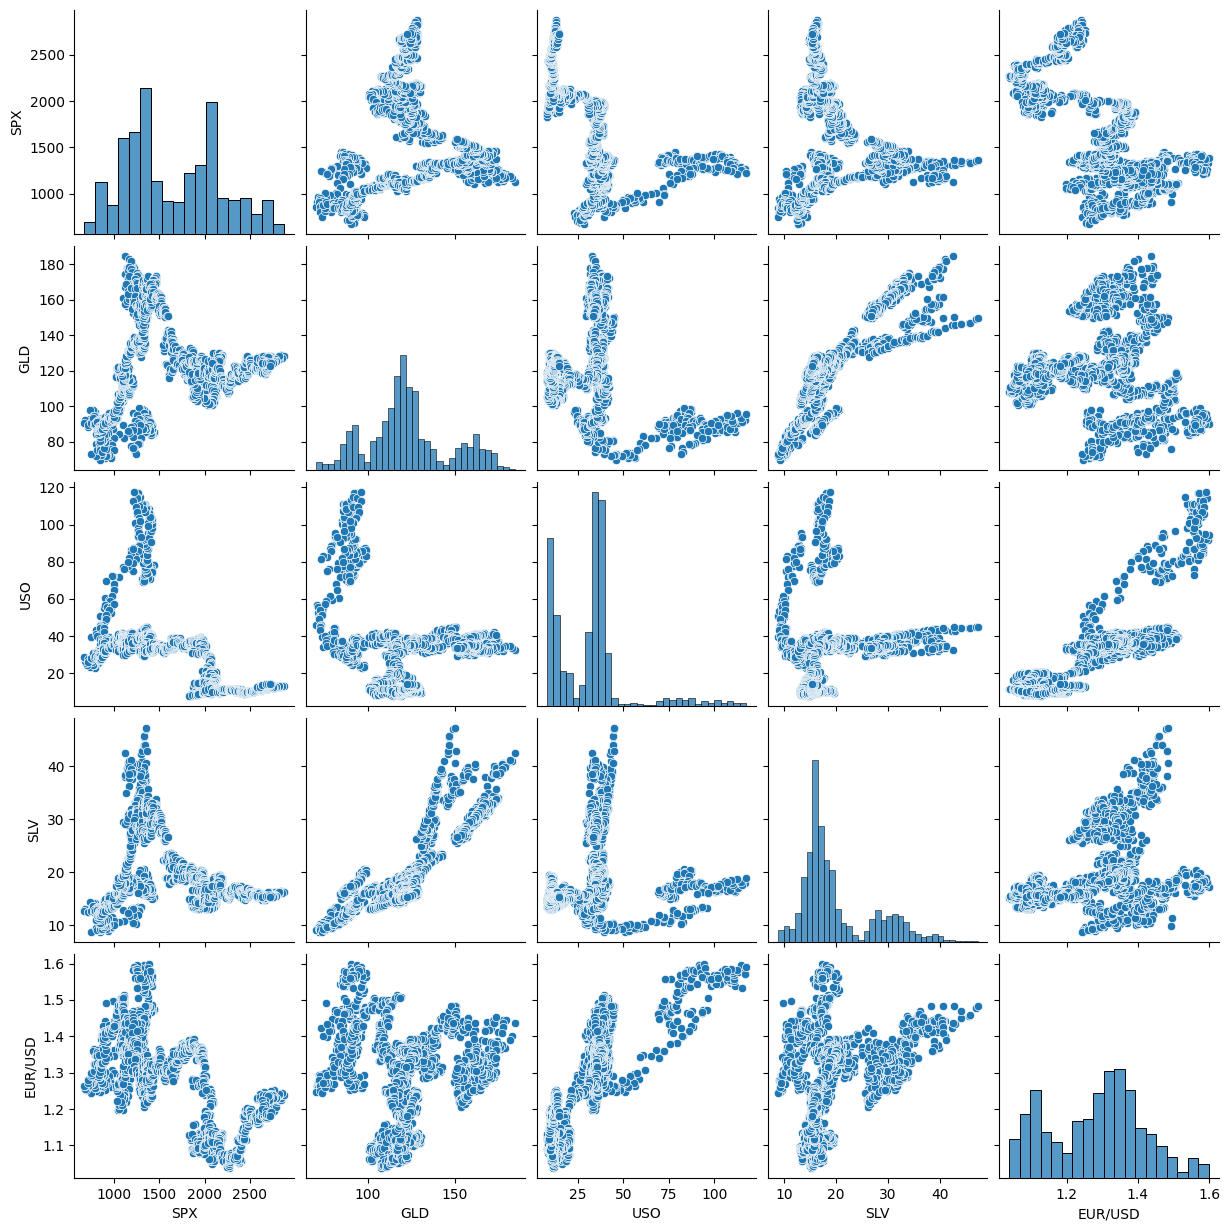

ValueError: could not convert string to float: '1/2/2008'

In [3]:
# Basic info
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Pairplot for numerical features
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Correlation**

---


*   Positive Correlation - when one feature increases the other feature increases as well.
*   Negetive Correlation - when one feature increases the other feature decreases.




In [ ]:
df=df.drop('Date',axis=1)
df.head()
correlation=df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

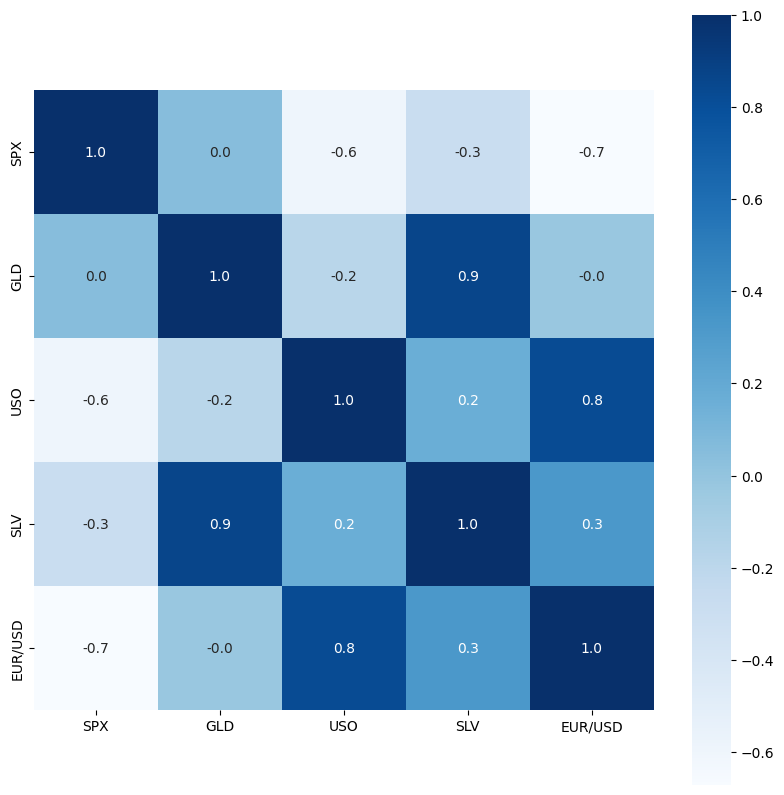

In [ ]:
#Mapping a heatmap of the correlation values
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='Blues',fmt='.1f',square=True)

In [ ]:
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


<Axes: xlabel='GLD', ylabel='Density'>

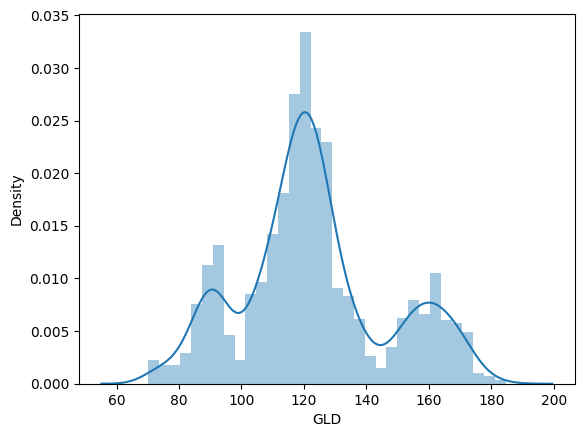

In [ ]:
#Tells about the density of the gold prices
sns.distplot(df['GLD'])
#Shows that the gold prices have mostly been around 120

In [ ]:
#Training and testing the model

X=df.drop('GLD',axis=1)
y=df['GLD']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestRegressor()
model.fit(X_train,y_train)

predictions=model.predict(X_test)
accuracy=metrics.r2_score(y_test,predictions)
print("predictions : ",predictions)
print("Accuracy : ",accuracy)

predictions :  [122.62039937 130.40850304 127.79339961  96.55029736 119.0129004
 114.45189942 124.7613012  117.74409943 108.05650116  98.22389973
  95.56709968 167.12119865 148.90830062 116.71370023 170.75190074
  84.94119934 122.93649881 108.66539717 112.96940097 131.48490332
 124.20739929 113.36600046 116.18870058 108.78759976 108.57970138
 125.73709898 119.43029988 112.3738992  113.49900151 125.61659849
 146.12560185  89.46990028 167.68549985 113.79099946 108.44350111
 120.04250123 141.46469911 161.25390127 174.39859771 153.24530158
 119.46130115 113.50180065 121.37789964 113.60849901 122.16000016
 108.07740079  88.05379913 114.47469919 129.99610285 118.04420095
 103.88770027 130.08630288 107.22199848 160.6000037  131.57950005
 117.95199987 147.12850055 136.22290222  95.20150126 124.50400168
 115.29349852  86.01700092 104.32259919 113.80750058  84.31409919
 122.37720023 116.40649904 113.6684019  164.7539033   92.31349993
  80.18790075 160.83950178 158.36660263 106.42659975 149.28080

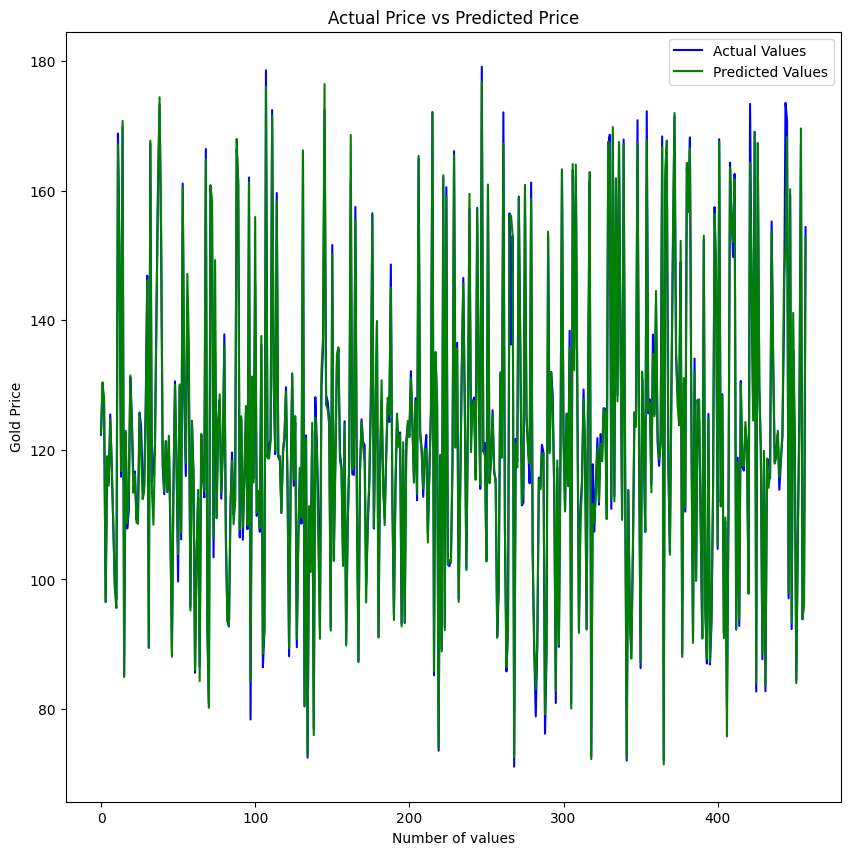

In [ ]:
#Plotting the predicted value vs the actual value
y_test=list(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test,color='blue',label='Actual Values')
plt.plot(predictions,color='green',label='Predicted Values')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()